# K-Nearest Classification

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from scipy import stats

## Dataset Acquisition

In [2]:
iris = load_iris()
df_iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['Class'])
df_iris['Species'] = df_iris['Class'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

## Using iloc to select input and output features

In [3]:
X = df_iris.iloc[:, :-2]
y = df_iris.iloc[:, -1]

## About the Dataset


In [4]:
print("Number of records and features:")
print(df_iris.shape)
print("\nNumber of records as per class:")
print(df_iris['Species'].value_counts())
print("\nInformation about the dataframe:")
print(df_iris.info())
print("\nNumerical description of the dataframe:")
print(df_iris.describe())

Number of records and features:
(150, 6)

Number of records as per class:
Setosa        50
Versicolor    50
Virginica     50
Name: Species, dtype: int64

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    float64
 5   Species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB
None

Numerical description of the dataframe:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066        

## Data Preprocessing

In [5]:
print("\nChecking for any missing values:")
print(df_iris.isnull().sum())


Checking for any missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
Species              0
dtype: int64


## Splitting of dataset into Train and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## Model Building

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Prediction of the Test set

In [8]:
y_pred = knn_model.predict(X_test)
print(y_pred)

['Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Virginica' 'Virginica'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Setosa']


## Evaluation of the model

In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Creating the confusion matrix

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

## Visualize the confusion matrix

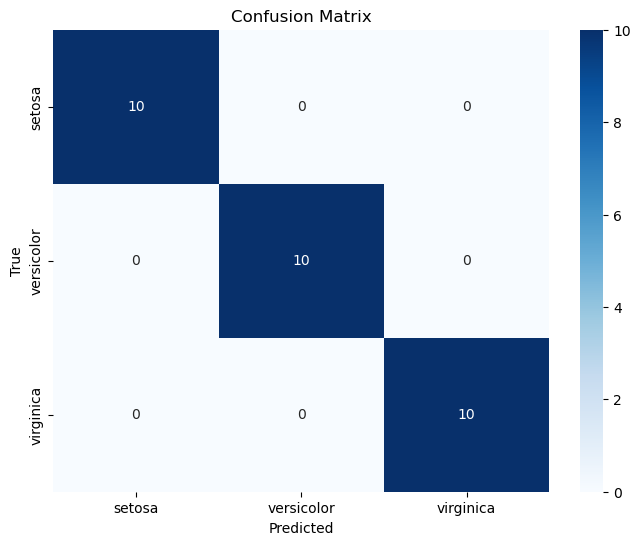

In [11]:
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()